In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
import pickle
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
import tensorflow as tf
import seaborn as sns
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import classification_report,confusion_matrix
import numpy as np
import matplotlib.pylab as plt

In [7]:
df = pd.read_csv('customers.csv')
df.head()
df.columns
df.dtypes
df.shape
df.isnull().sum()
df_cleaned=df.dropna(axis=0)
df_cleaned.isnull().sum()
df_cleaned.shape
df_cleaned.dtypes
df_cleaned['Gender'].unique()
df_cleaned['Ever_Married'].unique()
df_cleaned['Graduated'].unique()
df_cleaned['Family_Size'].unique()
df_cleaned['Var_1'].unique()
df_cleaned['Spending_Score'].unique()
df_cleaned['Profession'].unique()
df_cleaned['Segmentation'].unique()

array(['D', 'B', 'C', 'A'], dtype=object)

In [8]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

categories_list=[['Male','Female'],
                 ['No','Yes'],
                 ['No','Yes'],
                 ['Healthcare', 'Engineer', 'Lawyer', 'Artist', 'Doctor',
                 'Homemaker', 'Entertainment', 'Marketing', 'Executive'],
                 ['Low','Average','High']
                 ]
enc = OrdinalEncoder(categories = categories_list)

cust_1=df_cleaned.copy()
cust_1[['Gender','Ever_Married','Graduated','Profession','Spending_Score']]=enc.fit_transform(cust_1[['Gender','Ever_Married','Graduated','Profession','Spending_Score']])

cust_1.dtypes

ID                   int64
Gender             float64
Ever_Married       float64
Age                  int64
Graduated          float64
Profession         float64
Work_Experience    float64
Spending_Score     float64
Family_Size        float64
Var_1               object
Segmentation        object
dtype: object

In [9]:
le = LabelEncoder()


cust_1['Segmentation'] = le.fit_transform(cust_1['Segmentation'])


cust_1.dtypes


cust_1 = cust_1.drop('ID',axis=1)
cust_1 = cust_1.drop('Var_1',axis=1)


cust_1.dtypes


Gender             float64
Ever_Married       float64
Age                  int64
Graduated          float64
Profession         float64
Work_Experience    float64
Spending_Score     float64
Family_Size        float64
Segmentation         int64
dtype: object

In [10]:
corr = cust_1.corr()

<Axes: >

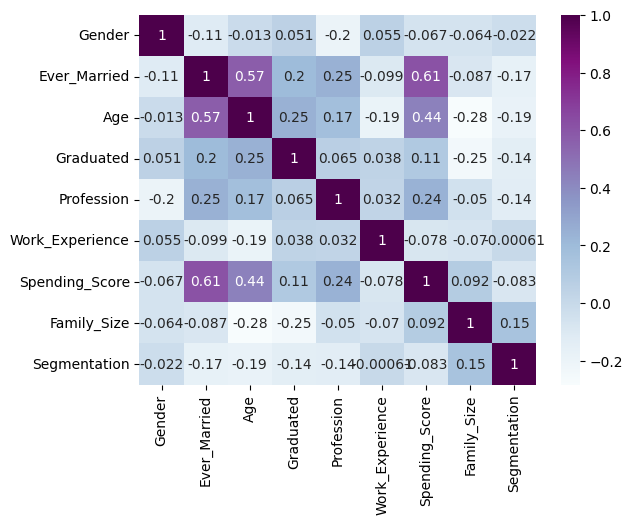

In [11]:
sns.heatmap(corr,
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        cmap="BuPu",
        annot= True)

In [12]:

cust_1.describe()
cust_1['Segmentation'].unique()

array([3, 1, 2, 0])

In [13]:
X=cust_1[['Gender','Ever_Married','Age','Graduated','Profession','Work_Experience','Spending_Score','Family_Size']].values

y1 = cust_1[['Segmentation']].values
one_hot_enc = OneHotEncoder()
one_hot_enc.fit(y1)
y1.shape
y = one_hot_enc.transform(y1).toarray()
y.shape
y1[0]
y[0]
X.shape
X_train,X_test,y_train,y_test=train_test_split(X,y,
                                               test_size=0.33,
                                               random_state=50)
X_train[0]
X_train.shape
scaler_age = MinMaxScaler()
scaler_age.fit(X_train[:,2].reshape(-1,1))
X_train_scaled = np.copy(X_train)
X_test_scaled = np.copy(X_test)


In [14]:
X_train_scaled[:,2] = scaler_age.transform(X_train[:,2].reshape(-1,1)).reshape(-1)
X_test_scaled[:,2] = scaler_age.transform(X_test[:,2].reshape(-1,1)).reshape(-1)


Epoch 1/2000
24/24 [==============================] - 4s 38ms/step - loss: 1.4370 - accuracy: 0.2947 - val_loss: 1.3944 - val_accuracy: 0.3020
Epoch 2/2000
24/24 [==============================] - 0s 10ms/step - loss: 1.3762 - accuracy: 0.3390 - val_loss: 1.3643 - val_accuracy: 0.3631
Epoch 3/2000
24/24 [==============================] - 0s 18ms/step - loss: 1.3479 - accuracy: 0.3698 - val_loss: 1.3395 - val_accuracy: 0.3731
Epoch 4/2000
24/24 [==============================] - 0s 13ms/step - loss: 1.3260 - accuracy: 0.3810 - val_loss: 1.3255 - val_accuracy: 0.3648
Epoch 5/2000
24/24 [==============================] - 0s 10ms/step - loss: 1.3112 - accuracy: 0.3775 - val_loss: 1.3139 - val_accuracy: 0.3707
Epoch 6/2000
24/24 [==============================] - 0s 7ms/step - loss: 1.2991 - accuracy: 0.3881 - val_loss: 1.3044 - val_accuracy: 0.3751
Epoch 7/2000
24/24 [==============================] - 0s 12ms/step - loss: 1.2906 - accuracy: 0.3968 - val_loss: 1.2965 - val_accuracy: 0.3851


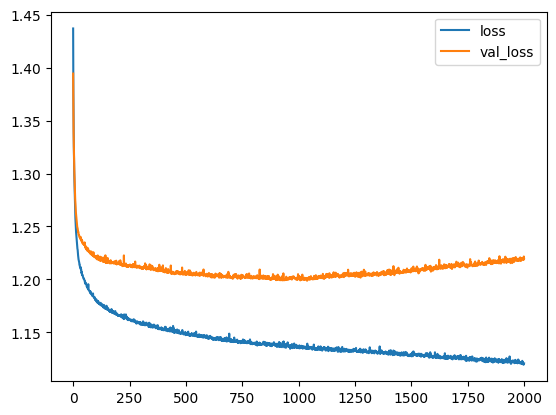

In [15]:
ai_brain = Sequential([
  Dense(8,input_shape=(8,)),
  Dense(16,activation='relu'),
  Dense(16,activation='relu'),
  Dense(4,activation='softmax'),
])

ai_brain.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])
early_stop = EarlyStopping(monitor='val_loss', patience=2)


ai_brain.fit(x=X_train_scaled,y=y_train,
             epochs=2000,batch_size=256,
             validation_data=(X_test_scaled,y_test),
             )
metrics = pd.DataFrame(ai_brain.history.history)

metrics.head()
metrics[['loss','val_loss']].plot()
x_test_predictions = np.argmax(ai_brain.predict(X_test_scaled), axis=1)
x_test_predictions.shape
y_test_truevalue = np.argmax(y_test,axis=1)
y_test_truevalue.shape
print(confusion_matrix(y_test_truevalue,x_test_predictions))
print(classification_report(y_test_truevalue,x_test_predictions))


In [16]:

ai_brain.save('customer_classification_model.h5')

In [17]:

with open('customer_data.pickle', 'wb') as fh:
   pickle.dump([X_train_scaled,y_train,X_test_scaled,y_test,cust_1,df_cleaned,scaler_age,enc,one_hot_enc,le], fh)

In [21]:
with open('customer_data.pickle', 'rb') as fh:
  [X_train_scaled,y_train,X_test_scaled,y_test,customers_1,customer_df_cleaned,scaler_age,enc,one_hot_enc,le]=pickle.load(fh)

In [20]:

x_single_prediction = np.argmax(ai_brain.predict(X_test_scaled[1:2,:]), axis=1)
print(x_single_prediction)
print(le.inverse_transform(x_single_prediction))

1/1 [==============================] - 0s 22ms/step
[2]
['C']
